# Analysis Clustering

This section is a continutation of the Analysis section of the project. While the previous notebook focused on insights gained from songs that have won in Music Award Shows from 2022 to the present, this notebook will focus on the song characteristics that we have extracted with the Essentia models. 

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path 

pd.set_option('display.max_rows', 10)

In [4]:
table_path = Path('data') / 'tables'

df = pd.read_csv(table_path / 'merged_award_show_winners.csv', keep_default_na=False, na_values=[''])
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Winner'] = (df.Placement == 1).astype(int)
df.head()

,Show,Date,Artist,Song,Total,Placement,file_path,vggish_dance,vggish_party,vggish_happy,vggish_sad,effnet_party,effnet_happy,effnet_sad,effnet_approachability,effnet_engagement,effnet_timbre_bright,tempo,Winner
0,Music Bank,2022-01-07,NCT U,Universe (Let's Play Ball),5930,1,data/audio/universe_(let's_play_ball)_nct_u.flac,90.834355,24.404429,69.484723,76.007283,1.950100,47.702590,92.827344,84.677964,96.713340,50.498027,90.0,1
1,Show! Music Core,2022-01-08,IVE,ELEVEN,6408,1,data/audio/eleven_ive.flac,94.969481,14.487433,81.253177,86.618626,2.623723,44.954056,88.753748,91.413623,92.127520,51.922780,120.0,1
2,Inkigayo,2022-01-09,IVE,ELEVEN,8533,1,data/audio/eleven_ive.flac,94.969481,14.487433,81.253177,86.618626,2.623723,44.954056,88.753748,91.413623,92.127520,51.922780,120.0,1
3,M Countdown,2022-01-13,Kep1er,WA DA DA,6500,1,data/audio/wa_da_da_kep1er.flac,96.806103,8.892013,78.541768,93.300325,1.427681,66.826451,95.882249,71.226579,97.789687,49.050614,126.0,1
4,Music Bank,2022-01-14,Kep1er,WA DA DA,3678,1,data/audio/wa_da_da_kep1er.flac,96.806103,8.892013,78.541768,93.300325,1.427681,66.826451,95.882249,71.226579,97.789687,49.050614,126.0,1


In [83]:
df_features = df.copy()
df_features = df.drop(columns=['Total', 'Placement', 'file_path'])
df_features['Year'] = df_features.Date.dt.year

In [84]:
df_features_wins = df_features.groupby(['Artist', 'Song']).max('Winner').reset_index()
df_features_wins

,Artist,Song,vggish_dance,vggish_party,vggish_happy,vggish_sad,effnet_party,effnet_happy,effnet_sad,effnet_approachability,effnet_engagement,effnet_timbre_bright,tempo,Winner,Year
0,(G)I-DLE,Fate,84.896469,34.739813,81.303847,75.299942,9.358502,57.875818,78.741151,93.074292,91.378111,51.323122,115.0,1,2024
1,(G)I-DLE,Klaxon,94.968641,12.903599,85.615873,88.196337,1.819611,89.399189,96.012467,89.402938,98.354894,46.346280,120.0,1,2024
2,(G)I-DLE,Nxde,91.352022,20.125379,73.873407,82.415354,9.886104,65.406495,90.909302,73.705781,94.579035,50.410295,136.0,1,2022
3,(G)I-DLE,Queencard,92.974675,14.018901,81.472057,88.088566,1.055446,87.547749,94.290841,80.356991,98.429632,48.344669,130.0,1,2023
4,(G)I-DLE,Super Lady,93.854207,11.460681,79.334843,90.879661,3.159283,58.017582,90.699446,83.888745,96.587032,49.879000,122.0,1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,xikers,BREATHE,85.196966,29.395086,51.734620,77.542847,20.699333,46.466920,89.911395,57.283974,93.417108,48.471853,155.0,0,2025
444,xikers,Bittersweet,94.634980,14.152902,69.460541,83.893681,10.475194,43.760720,86.478573,76.828885,90.406358,51.269013,130.0,0,2024
445,xikers,DO or DIE,76.148283,23.598190,62.018633,93.452352,5.584002,80.498070,96.787137,75.473613,99.064237,46.210933,169.0,0,2023
446,xikers,HOMEBOY,93.750942,16.895656,68.301415,71.766502,6.488638,59.391260,89.845961,80.581129,95.526505,50.632000,138.0,0,2023


In [85]:
df_features_wins

,Artist,Song,vggish_dance,vggish_party,vggish_happy,vggish_sad,effnet_party,effnet_happy,effnet_sad,effnet_approachability,effnet_engagement,effnet_timbre_bright,tempo,Winner,Year
0,(G)I-DLE,Fate,84.896469,34.739813,81.303847,75.299942,9.358502,57.875818,78.741151,93.074292,91.378111,51.323122,115.0,1,2024
1,(G)I-DLE,Klaxon,94.968641,12.903599,85.615873,88.196337,1.819611,89.399189,96.012467,89.402938,98.354894,46.346280,120.0,1,2024
2,(G)I-DLE,Nxde,91.352022,20.125379,73.873407,82.415354,9.886104,65.406495,90.909302,73.705781,94.579035,50.410295,136.0,1,2022
3,(G)I-DLE,Queencard,92.974675,14.018901,81.472057,88.088566,1.055446,87.547749,94.290841,80.356991,98.429632,48.344669,130.0,1,2023
4,(G)I-DLE,Super Lady,93.854207,11.460681,79.334843,90.879661,3.159283,58.017582,90.699446,83.888745,96.587032,49.879000,122.0,1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,xikers,BREATHE,85.196966,29.395086,51.734620,77.542847,20.699333,46.466920,89.911395,57.283974,93.417108,48.471853,155.0,0,2025
444,xikers,Bittersweet,94.634980,14.152902,69.460541,83.893681,10.475194,43.760720,86.478573,76.828885,90.406358,51.269013,130.0,0,2024
445,xikers,DO or DIE,76.148283,23.598190,62.018633,93.452352,5.584002,80.498070,96.787137,75.473613,99.064237,46.210933,169.0,0,2023
446,xikers,HOMEBOY,93.750942,16.895656,68.301415,71.766502,6.488638,59.391260,89.845961,80.581129,95.526505,50.632000,138.0,0,2023


In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = df_features_wins.select_dtypes(include=['float64', 'int64', 'int32']).columns
X = df_features_wins.copy()[numerical_features]
X = X.drop('Winner', axis=1)

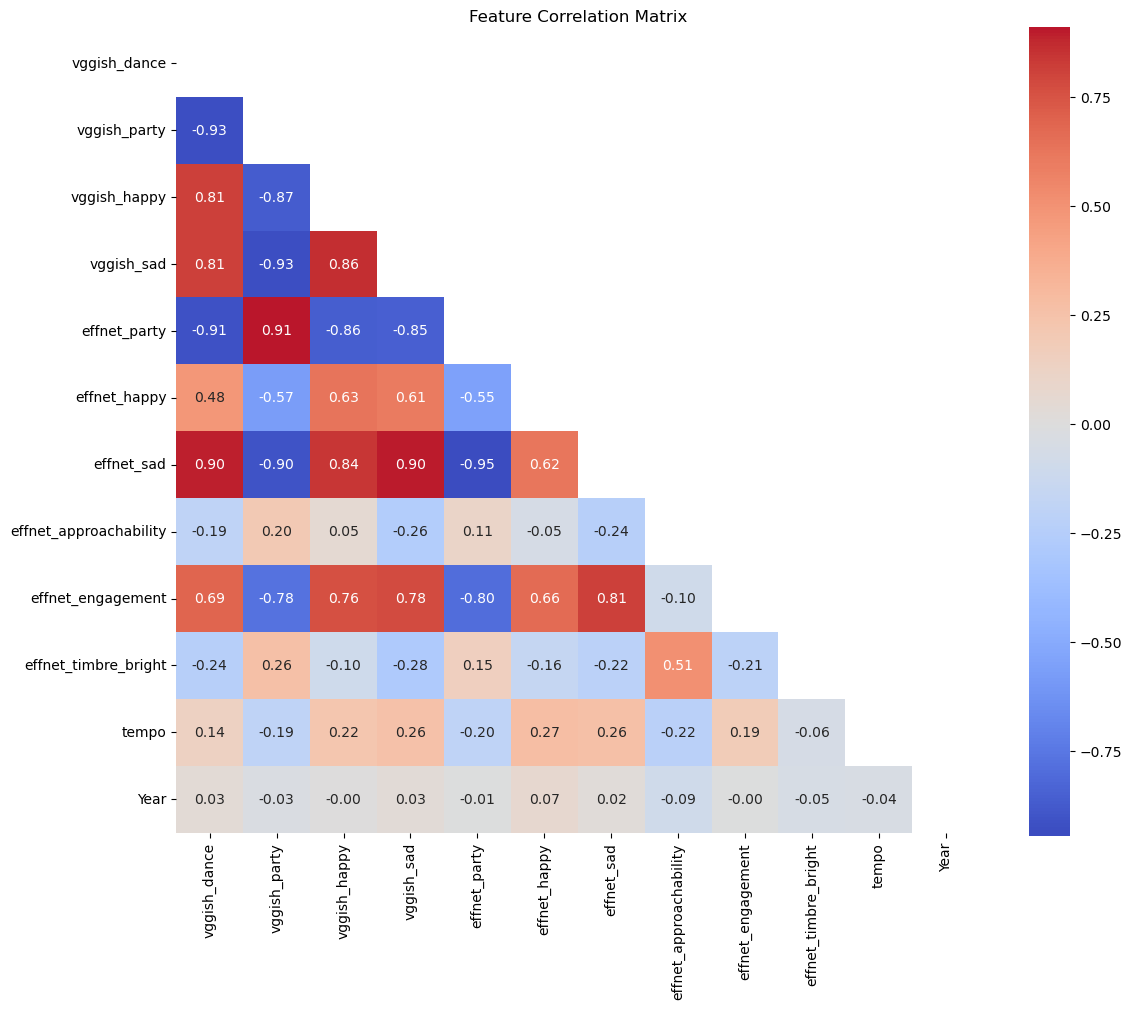


Highly correlated feature pairs:
vggish_dance -- vggish_party: -0.93
vggish_dance -- vggish_happy: 0.81
vggish_dance -- vggish_sad: 0.81
vggish_dance -- effnet_party: -0.91
vggish_dance -- effnet_sad: 0.90
vggish_party -- vggish_dance: -0.93
vggish_party -- vggish_happy: -0.87
vggish_party -- vggish_sad: -0.93
vggish_party -- effnet_party: 0.91
vggish_party -- effnet_sad: -0.90
vggish_happy -- vggish_dance: 0.81
vggish_happy -- vggish_party: -0.87
vggish_happy -- vggish_sad: 0.86
vggish_happy -- effnet_party: -0.86
vggish_happy -- effnet_sad: 0.84
vggish_sad -- vggish_dance: 0.81
vggish_sad -- vggish_party: -0.93
vggish_sad -- vggish_happy: 0.86
vggish_sad -- effnet_party: -0.85
vggish_sad -- effnet_sad: 0.90
effnet_party -- vggish_dance: -0.91
effnet_party -- vggish_party: 0.91
effnet_party -- vggish_happy: -0.86
effnet_party -- vggish_sad: -0.85
effnet_party -- effnet_sad: -0.95
effnet_sad -- vggish_dance: 0.90
effnet_sad -- vggish_party: -0.90
effnet_sad -- vggish_happy: 0.84
effne

In [87]:
# Create correlation matrix
correlation_matrix = X.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            square=True,  # Make cells square
            fmt='.2f',  # Round to 2 decimal places
            mask=np.triu(correlation_matrix))  # Show only lower triangle

plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Find highly correlated feature pairs (correlation > 0.8)
high_corr = np.where(np.abs(correlation_matrix) > 0.8)
high_corr = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
             for x, y in zip(*high_corr) if x != y]

# Display highly correlated pairs
print("\nHighly correlated feature pairs:")
for feat1, feat2, corr in high_corr:
    print(f"{feat1} -- {feat2}: {corr:.2f}")

In [88]:
# Create a set of features to remove
features_to_remove = set()

# For each highly correlated pair, keep the first feature and remove the second
for feat1, feat2, corr in high_corr:
    features_to_remove.add(feat1)

# Create new dataframe without highly correlated features
X_reduced = X.drop(columns=list(features_to_remove))

print(f"Original features: {X.shape[1]}")
print(f"Features after removing correlations: {X_reduced.shape[1]}")
print("\nRemoved features:")
for feat in features_to_remove:
    print(f"- {feat}")

Original features: 12
Features after removing correlations: 5

Removed features:
- effnet_sad
- vggish_sad
- effnet_engagement
- vggish_dance
- vggish_party
- vggish_happy
- effnet_party


In [111]:
X_reduced.columns

Index(['effnet_happy', 'effnet_approachability', 'effnet_timbre_bright',
       'tempo', 'Year'],
      dtype='object')

In [90]:
X_scaled = scaler.fit_transform(X_reduced)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.merge(df_features_wins.copy(), pd.DataFrame(data=pca_result,columns=['PC1', 'PC2']), left_index=True, right_index=True)

In [91]:
pca_df

,Artist,Song,vggish_dance,vggish_party,vggish_happy,vggish_sad,effnet_party,effnet_happy,effnet_sad,effnet_approachability,effnet_engagement,effnet_timbre_bright,tempo,Winner,Year,PC1,PC2
0,(G)I-DLE,Fate,84.896469,34.739813,81.303847,75.299942,9.358502,57.875818,78.741151,93.074292,91.378111,51.323122,115.0,1,2024,0.465256,0.534765
1,(G)I-DLE,Klaxon,94.968641,12.903599,85.615873,88.196337,1.819611,89.399189,96.012467,89.402938,98.354894,46.346280,120.0,1,2024,-1.823975,0.707157
2,(G)I-DLE,Nxde,91.352022,20.125379,73.873407,82.415354,9.886104,65.406495,90.909302,73.705781,94.579035,50.410295,136.0,1,2022,-1.190614,1.123883
3,(G)I-DLE,Queencard,92.974675,14.018901,81.472057,88.088566,1.055446,87.547749,94.290841,80.356991,98.429632,48.344669,130.0,1,2023,-1.822409,1.249579
4,(G)I-DLE,Super Lady,93.854207,11.460681,79.334843,90.879661,3.159283,58.017582,90.699446,83.888745,96.587032,49.879000,122.0,1,2024,-0.622915,0.187583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,xikers,BREATHE,85.196966,29.395086,51.734620,77.542847,20.699333,46.466920,89.911395,57.283974,93.417108,48.471853,155.0,0,2025,-3.151006,-0.658628
444,xikers,Bittersweet,94.634980,14.152902,69.460541,83.893681,10.475194,43.760720,86.478573,76.828885,90.406358,51.269013,130.0,0,2024,-0.540219,-0.039108
445,xikers,DO or DIE,76.148283,23.598190,62.018633,93.452352,5.584002,80.498070,96.787137,75.473613,99.064237,46.210933,169.0,0,2023,-3.239890,1.557844
446,xikers,HOMEBOY,93.750942,16.895656,68.301415,71.766502,6.488638,59.391260,89.845961,80.581129,95.526505,50.632000,138.0,0,2023,-0.771432,0.965576


In [92]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X_reduced.columns
)
loadings.sort_values(by='PC1', ascending=False)

,PC1,PC2
effnet_approachability,0.608902,0.313664
effnet_timbre_bright,0.581383,0.363650
Year,-0.138485,-0.254811
effnet_happy,-0.353103,0.579717
tempo,-0.383892,0.606938


In [93]:
pca.explained_variance_ratio_

array([0.33571835, 0.22568578])

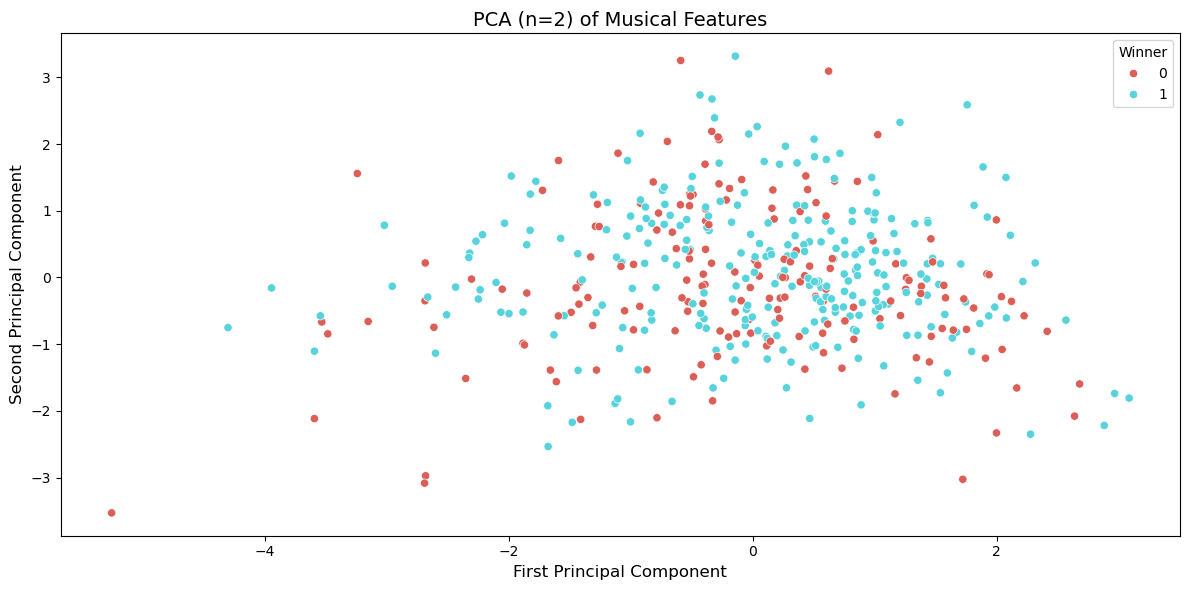

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
palette = sns.color_palette('hls', n_colors=2)

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Winner', palette=palette)

# plt.xticks(rotation=45)

plt.title('PCA (n=2) of Musical Features', fontsize=14)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)

plt.tight_layout()
# plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Based on the PCA plot above, it appears that there is no clear boundary or clustering between the two groups. Furthermore, there appears to be a significant amount of overlapping points. This suggests that the musical features in the form of *PC1* and *PC2* are not great differentiators between winners and non-winners. 

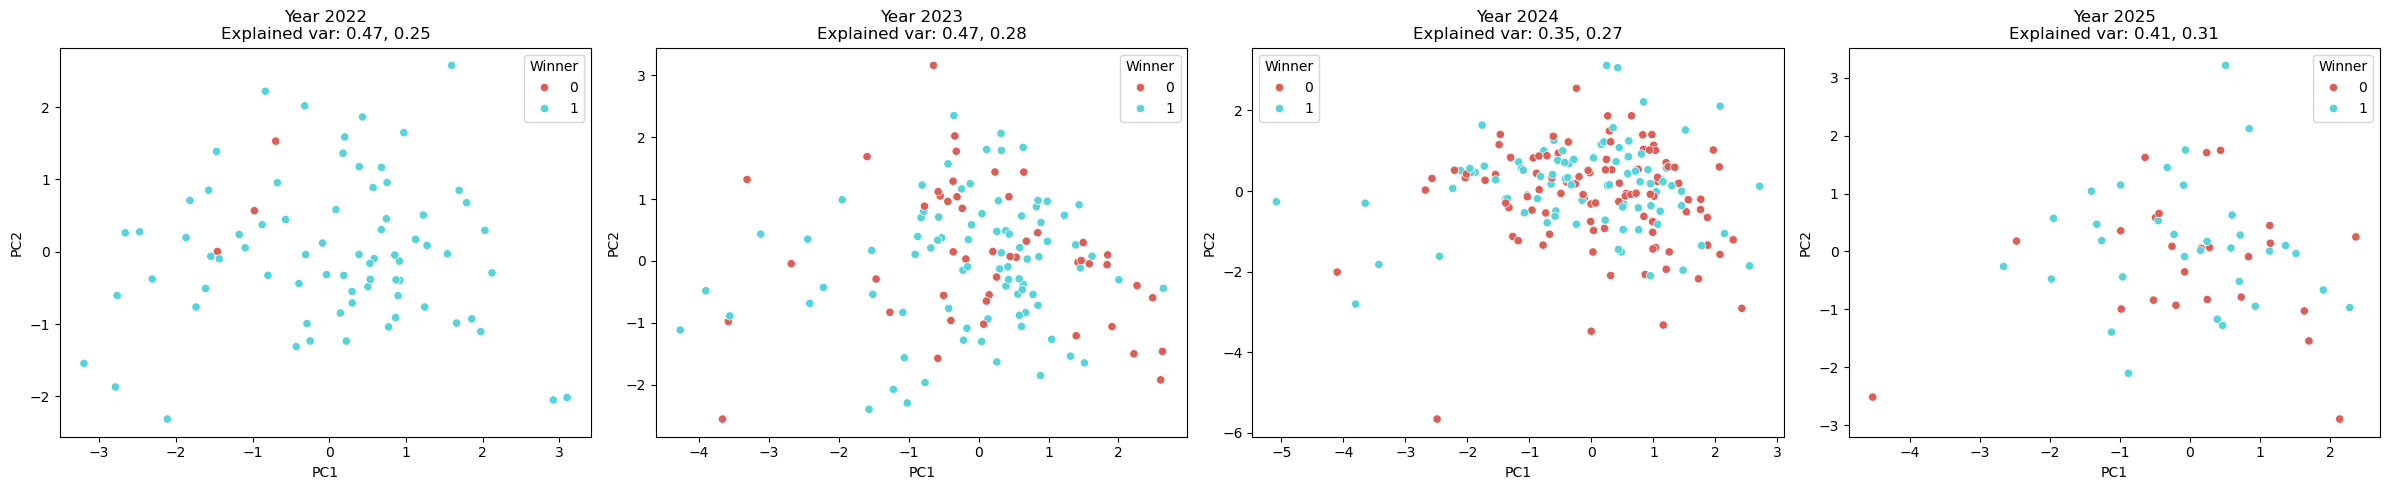

In [106]:
def remove_correlations(X, threshold=0.8):
    """Remove highly correlated features from dataset"""
    correlation_matrix = X.corr()
    high_corr = np.where(np.abs(correlation_matrix) > threshold)
    high_corr = [(correlation_matrix.index[x], correlation_matrix.columns[y]) 
                 for x, y in zip(*high_corr) if x != y]
    
    features_to_remove = set()
    for feat1, feat2 in high_corr:
        features_to_remove.add(feat1)
    return X.drop(columns=list(features_to_remove))

def pca_by_year(year_data):
    """Perform PCA for a specific year with correlation handling"""
    X = year_data[numerical_features]
    X = X.drop(['Winner', 'Year'], axis=1)
    # Remove correlations before scaling and PCA
    X_reduced = remove_correlations(X)
    X_scaled = scaler.fit_transform(X_reduced)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X_scaled)
    return pca_result, pca.explained_variance_ratio_

# Create subplots for each year
years = df_features_wins['Year'].unique()
fig, axes = plt.subplots(1, len(years), figsize=(6*len(years), 5))

for idx, year in enumerate(sorted(years)):
    year_data = df_features_wins[df_features_wins['Year'] == year]
    pca_result, var_ratio = pca_by_year(year_data)
    
    ax = axes[idx]
    scatter_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
    scatter_df['Winner'] = year_data['Winner'].values
    
    sns.scatterplot(data=scatter_df, x='PC1', y='PC2', hue='Winner', 
                    palette=palette, ax=ax)
    ax.set_title(f'Year {year}\nExplained var: {var_ratio[0]:.2f}, {var_ratio[1]:.2f}')

plt.tight_layout()
plt.show()

Once again, we can observe that there aren't any visible clusters to differentiate the data when we controlled by the year. Thus, we are going to explore alternative relationships with a mixture of the song characteristics and non-musical features.

In [115]:
# # 1. Create combined analysis dataframe with temporal features
# combined_df = pd.merge(
#     df_features_wins,
#     df[['Artist', 'Song', 'Show', 'Date']], 
#     on=['Artist', 'Song']
# )

# # Add temporal features
# combined_df['Month'] = combined_df['Date'].dt.month
# combined_df['Season'] = pd.cut(
#     combined_df['Month'], 
#     bins=[0,3,6,9,12], 
#     labels=['Winter', 'Spring', 'Summer', 'Fall']
# )

# # 2. Analyze winning patterns by season and show type
# seasonal_wins = combined_df.groupby(['Season', 'Winner']).size().unstack()
# show_type_wins = combined_df.groupby(['Show', 'Winner']).size().unstack()

# # Visualize patterns
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# # Seasonal patterns
# seasonal_wins.plot(kind='bar', ax=ax1)
# ax1.set_title('Winning Patterns by Season')
# ax1.set_xlabel('Season')
# ax1.set_ylabel('Count')

# # Show type patterns
# show_type_wins.plot(kind='bar', ax=ax2)
# ax2.set_title('Winning Patterns by Show Type')
# ax2.set_xlabel('Show Type')
# ax2.set_ylabel('Count')

# plt.tight_layout()
# plt.show()

# # 3. Analyze musical features by season
# seasonal_features = combined_df.groupby('Season')[X_reduced.columns].mean()
# seasonal_features.drop('Year', inplace=True, axis=1)
# plt.figure(figsize=(12, 6))
# sns.heatmap(seasonal_features, annot=True, fmt='.2f', cmap='coolwarm')
# plt.title('Average Musical Features by Season')
# plt.tight_layout()
# plt.show()

# # 4. Create a summary of winning characteristics
# winning_summary = pd.DataFrame({
#     'Musical_Features': combined_df[combined_df['Winner'] == 1][X_reduced.columns].mean(),
#     'Non_Musical_Features': {
#         'Most_Common_Season': combined_df[combined_df['Winner'] == 1]['Season'].mode()[0],
#         'Most_Common_Show': combined_df[combined_df['Winner'] == 1]['Show'].mode()[0],
#         'Total_Winners': combined_df['Winner'].sum()
#     }
# })

# print("\nSummary of Winning Song Characteristics:")
# print(winning_summary)

In [117]:
df_features

,Show,Date,Artist,Song,vggish_dance,vggish_party,vggish_happy,vggish_sad,effnet_party,effnet_happy,effnet_sad,effnet_approachability,effnet_engagement,effnet_timbre_bright,tempo,Winner,Year
0,Music Bank,2022-01-07,NCT U,Universe (Let's Play Ball),90.834355,24.404429,69.484723,76.007283,1.950100,47.702590,92.827344,84.677964,96.713340,50.498027,90.0,1,2022
1,Show! Music Core,2022-01-08,IVE,ELEVEN,94.969481,14.487433,81.253177,86.618626,2.623723,44.954056,88.753748,91.413623,92.127520,51.922780,120.0,1,2022
2,Inkigayo,2022-01-09,IVE,ELEVEN,94.969481,14.487433,81.253177,86.618626,2.623723,44.954056,88.753748,91.413623,92.127520,51.922780,120.0,1,2022
3,M Countdown,2022-01-13,Kep1er,WA DA DA,96.806103,8.892013,78.541768,93.300325,1.427681,66.826451,95.882249,71.226579,97.789687,49.050614,126.0,1,2022
4,Music Bank,2022-01-14,Kep1er,WA DA DA,96.806103,8.892013,78.541768,93.300325,1.427681,66.826451,95.882249,71.226579,97.789687,49.050614,126.0,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,M Countdown,2025-04-17,J-Hope,MONA LISA,97.054577,17.678125,60.819304,67.917317,10.585602,39.631873,87.287062,87.912464,92.784697,45.539203,138.0,1,2025
1706,Music Bank,2025-04-18,Mark,1999,89.464378,20.914400,68.907583,79.903740,11.274675,38.706461,84.773290,84.185988,93.693328,50.857013,109.0,1,2025
1707,Show! Music Core,2025-04-19,Mark,1999,89.464378,20.914400,68.907583,79.903740,11.274675,38.706461,84.773290,84.185988,93.693328,50.857013,109.0,1,2025
1708,Inkigayo,2025-04-20,LE SSERAFIM,HOT,85.022485,36.216292,74.394268,59.621853,4.694841,70.224762,91.213101,75.978297,93.216521,47.584522,128.0,1,2025


# Prototyping Models

In [125]:
combined_df = df_features.copy()
# Add temporal features
combined_df['Month'] = combined_df['Date'].dt.month
combined_df['Season'] = pd.cut(
    combined_df['Month'], 
    bins=[0,3,6,9,12], 
    labels=['Winter', 'Spring', 'Summer', 'Fall']
)
combined_df = combined_df.iloc[:, [0, 1, -2, -3, -1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
combined_df

,Show,Date,Month,Year,Season,Artist,Song,vggish_dance,vggish_party,vggish_happy,vggish_sad,effnet_party,effnet_happy,effnet_sad,effnet_approachability,effnet_engagement,effnet_timbre_bright,tempo,Winner
0,Music Bank,2022-01-07,1,2022,Winter,NCT U,Universe (Let's Play Ball),90.834355,24.404429,69.484723,76.007283,1.950100,47.702590,92.827344,84.677964,96.713340,50.498027,90.0,1
1,Show! Music Core,2022-01-08,1,2022,Winter,IVE,ELEVEN,94.969481,14.487433,81.253177,86.618626,2.623723,44.954056,88.753748,91.413623,92.127520,51.922780,120.0,1
2,Inkigayo,2022-01-09,1,2022,Winter,IVE,ELEVEN,94.969481,14.487433,81.253177,86.618626,2.623723,44.954056,88.753748,91.413623,92.127520,51.922780,120.0,1
3,M Countdown,2022-01-13,1,2022,Winter,Kep1er,WA DA DA,96.806103,8.892013,78.541768,93.300325,1.427681,66.826451,95.882249,71.226579,97.789687,49.050614,126.0,1
4,Music Bank,2022-01-14,1,2022,Winter,Kep1er,WA DA DA,96.806103,8.892013,78.541768,93.300325,1.427681,66.826451,95.882249,71.226579,97.789687,49.050614,126.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,M Countdown,2025-04-17,4,2025,Spring,J-Hope,MONA LISA,97.054577,17.678125,60.819304,67.917317,10.585602,39.631873,87.287062,87.912464,92.784697,45.539203,138.0,1
1706,Music Bank,2025-04-18,4,2025,Spring,Mark,1999,89.464378,20.914400,68.907583,79.903740,11.274675,38.706461,84.773290,84.185988,93.693328,50.857013,109.0,1
1707,Show! Music Core,2025-04-19,4,2025,Spring,Mark,1999,89.464378,20.914400,68.907583,79.903740,11.274675,38.706461,84.773290,84.185988,93.693328,50.857013,109.0,1
1708,Inkigayo,2025-04-20,4,2025,Spring,LE SSERAFIM,HOT,85.022485,36.216292,74.394268,59.621853,4.694841,70.224762,91.213101,75.978297,93.216521,47.584522,128.0,1


### Baseline Model

In [139]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# 1. Cyclic encoding function
def encode_month_cyclic(X):
    X = pd.DataFrame(X)  # Ensure X is always treated as DataFrame
    return np.column_stack([
        np.sin(2*np.pi*X.iloc[:,0]/12), 
        np.cos(2*np.pi*X.iloc[:,0]/12)
    ])

cyclic_month = FunctionTransformer(encode_month_cyclic, validate=False)

# 2. Features
X_train = combined_df.copy().drop('Winner', axis=1)[['effnet_happy','effnet_approachability','effnet_timbre_bright','tempo', 'Year', 'Month', 'Show', 'Artist']]
y_train = combined_df['Winner']

# 3. Column transformer
preprocessor = make_column_transformer(
    (StandardScaler(), ['effnet_happy','effnet_approachability','effnet_timbre_bright','tempo']),
    (OneHotEncoder(sparse_output=False), ['Year']),
    (cyclic_month, ['Month']),
    (OneHotEncoder(sparse_output=False), ['Show']),
    (OneHotEncoder(sparse_output=False), ['Artist'])
)

# 4. Full pipeline
pipeline = Pipeline([
    ('prep', preprocessor),
    ('lda', LDA(n_components=1))
])

# 5. Fit & transform
X_lda = pipeline.fit_transform(X_train, y_train)


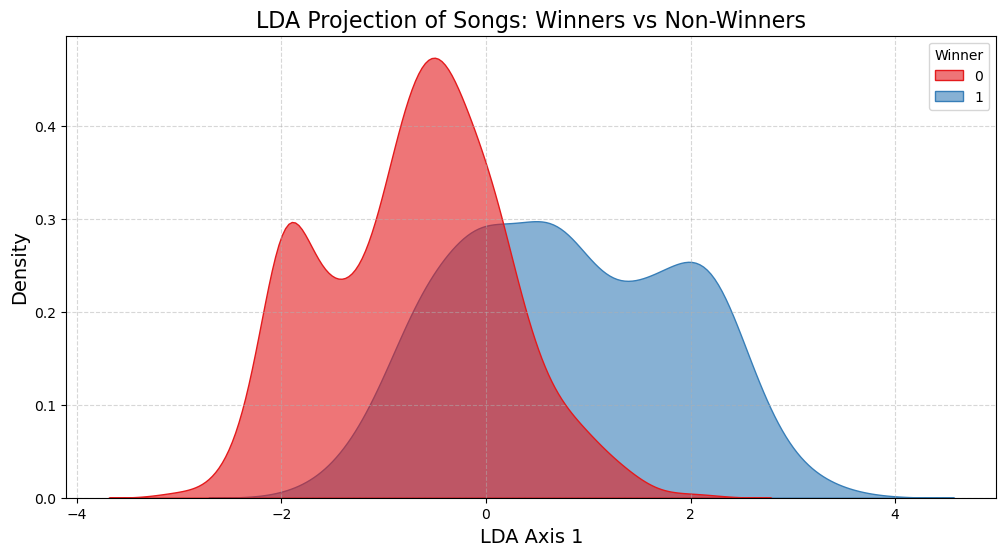

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make a DataFrame for plotting
lda_df = pd.DataFrame({
    'LDA1': X_lda.flatten(),  # Flatten because it's (n_samples,1)
    'Winner': y_train.values
})

plt.figure(figsize=(12,6))
sns.kdeplot(data=lda_df, x='LDA1', hue='Winner', fill=True, common_norm=False, alpha=0.6, palette='Set1')

plt.title('LDA Projection of Songs: Winners vs Non-Winners', fontsize=16)
plt.xlabel('LDA Axis 1', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


ROC AUC Score: 0.846
Accuracy: 0.760


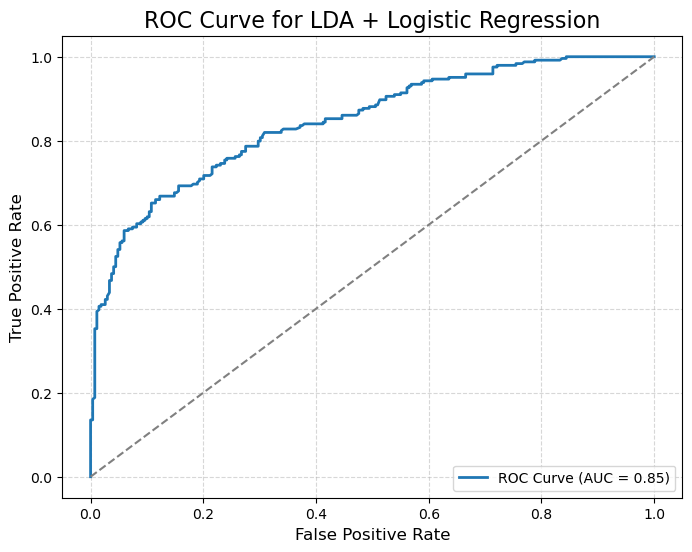

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# 1. Train/Test Split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_lda, y_train, test_size=0.3, random_state=42, stratify=y_train
)

# 2. Train simple logistic model
clf = LogisticRegression()
clf.fit(X_train_split, y_train_split)

# 3. Predict probabilities
y_pred_proba = clf.predict_proba(X_test_split)[:,1]

# 4. Evaluate
roc_auc = roc_auc_score(y_test_split, y_pred_proba)
acc = accuracy_score(y_test_split, clf.predict(X_test_split))

print(f"ROC AUC Score: {roc_auc:.3f}")
print(f"Accuracy: {acc:.3f}")

# 5. Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_split, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for LDA + Logistic Regression', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right')
plt.show()


### Model 1: Utilizing Historical Aggregation Data

In [ ]:
# from sklearn.base import BaseEstimator, TransformerMixin

# class HistoricalAggregator(BaseEstimator, TransformerMixin):
#     def __init__(self, date_col='Date', artist_col = 'Artist', target_col='Winner'):
#         self.date_col = date_col
#         self.artist_col = artist_col
#         self.target_col = target_col

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         df = X.copy()

#         df["_orig_index"] = np.arange(len(df))

#         df[self.date_col] = pd.to_datetime(df[self.date_col])

#         df = df.sort_values(self.date_col)

#         df['past_wins'] = (
#             df.groupby(self.artist_col)[self.target_col]
#             .cumsum()
#             .shift(fill_value=0)
#         )
#         df['past_shows'] = df.groupby(self.artist_col).cumcount()

#         # Historical win rate (0 if no past shows)
#         df['hist_win_rate'] = df['past_wins'] / df['past_shows'].replace(0, np.nan)
#         df['hist_win_rate'] = df['hist_win_rate'].fillna(0)

#         df = df.sort_values('_orig_index').drop(columns=['_orig_index', 'past_wins', 'past_shows', self.target_col])

#         return df

In [190]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline

# 1) Split out your X/y
X = combined_df.drop(columns=['Winner'])
y = combined_df["Winner"]

# 2) Define the cyclic month transformer
def encode_month_cyclic(X):
    X = pd.DataFrame(X)  # Ensure X is always treated as DataFrame
    return np.column_stack([
        np.sin(2*np.pi*X.iloc[:,0]/12), 
        np.cos(2*np.pi*X.iloc[:,0]/12)
    ])
    
month_cyclic = FunctionTransformer(encode_month_cyclic, validate=False)
log_transformer = FunctionTransformer(lambda x: np.log1p(x), validate=False)

# 3) Build column transformer (after historical aggregator)
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('log', log_transformer),
        ('scale', StandardScaler())
    ]), ["effnet_happy","effnet_approachability","effnet_timbre_bright","tempo"]),
    ('year', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["Year"]),
    ('month', month_cyclic, ["Month"]),
    ('show', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["Show"]),
    ('artist', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["Artist"]),
    ('season', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["Season"]),
    # leave hist_win_rate in numeric group
])

# 4) Full pipeline
pipeline = Pipeline([
    # ("history", HistoricalAggregator(date_col="Date", artist_col="Artist", target_col="Winner")),
    ("prep", preprocessor),
    ("lda", LDA(n_components=1)),
])

# 5) Fit & transform
X_lda = pipeline.fit_transform(X, y)

In [191]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
tscv = TimeSeriesSplit(n_splits=5)

scores = cross_val_score(pipeline, X, y, cv=tscv, scoring="roc_auc")
print("AUC per fold:", scores)


AUC per fold: [0.44604458 0.64792169 0.57457011 0.5269796  0.55397365]


ROC AUC Score: 0.848
Accuracy: 0.770


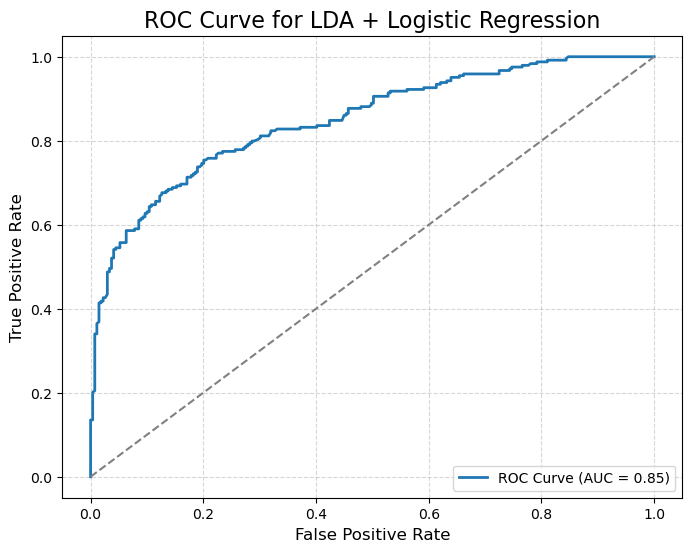

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# 1. Train/Test Split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_lda, y, test_size=0.3, random_state=42, stratify=y
)

# 2. Train simple logistic model
clf = LogisticRegression()
clf.fit(X_train_split, y_train_split)

# 3. Predict probabilities
y_pred_proba = clf.predict_proba(X_test_split)[:,1]

# 4. Evaluate
roc_auc = roc_auc_score(y_test_split, y_pred_proba)
acc = accuracy_score(y_test_split, clf.predict(X_test_split))

print(f"ROC AUC Score: {roc_auc:.3f}")
print(f"Accuracy: {acc:.3f}")

# 5. Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_split, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for LDA + Logistic Regression', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right')
plt.show()


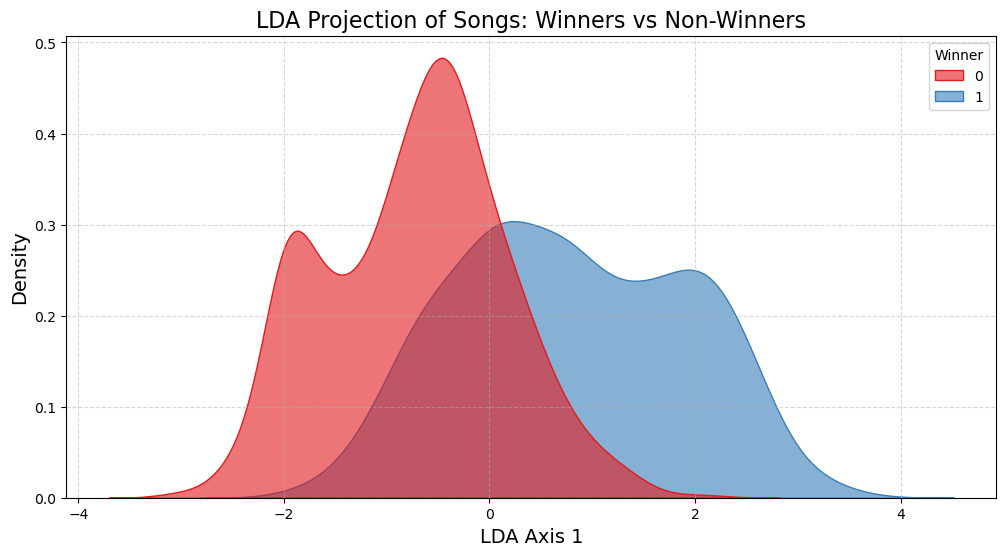

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make a DataFrame for plotting
lda_df = pd.DataFrame({
    'LDA1': X_lda.flatten(),  # Flatten because it's (n_samples,1)
    'Winner': y.values
})

plt.figure(figsize=(12,6))
sns.kdeplot(data=lda_df, x='LDA1', hue='Winner', fill=True, common_norm=False, alpha=0.6, palette='Set1')

plt.title('LDA Projection of Songs: Winners vs Non-Winners', fontsize=16)
plt.xlabel('LDA Axis 1', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Model 2: Random Forest

In [214]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('log', log_transformer),
        ('scale', StandardScaler())
    ]), ["effnet_happy","effnet_approachability","effnet_timbre_bright","tempo"]),
    ('year', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["Year"]),
    ('month', month_cyclic, ["Month"]),
    ('show', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["Show"]),
    ('artist', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["Artist"]),
    ('season', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["Season"]),
    # leave hist_win_rate in numeric group
])

param_grid = [
    {
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [50, 100],
        'clf__max_depth': [3, 5, 10, 30]
    },
    {
        'clf': [GradientBoostingClassifier()],
        'clf__n_estimators': [50, 100],
        'clf__learning_rate': [0.05, 0.1]
    },
    {
        'clf': [LogisticRegression(max_iter=1000)],
        'clf__C': [0.1, 1, 10]
    },
    {
        'clf': [SVC()],
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf']
    },
    {
        'clf': [BaggingClassifier()],
        'clf__n_estimators': [10, 20],
        'clf__estimator': [SVC(), RandomForestClassifier()]
    },
    {
        'clf': [LGBMClassifier()]
    }
]

# 4) Full pipeline
pipeline = Pipeline([
    # ("history", HistoricalAggregator(date_col="Date", artist_col="Artist", target_col="Winner")),
    ("prep", preprocessor),
    ("clf", RandomForestClassifier()),
])

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 521, number of negative: 573
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 1094, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476234 -> initscore=-0.095136
[LightGBM] [Info] Start training from score -0.095136
[LightGBM] [Info] Number of positive: 521, number of negative: 573
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 892
[LightGBM] [Info] Number of data points in the train set: 1094, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476234 -> initscore=-0.095136
[LightGBM] [Info] Start training from score -0.095136
[LightGBM] [Info] Number

/home/ccaban/miniforge3/envs/essentia/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/ccaban/miniforge3/envs/essentia/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/ccaban/miniforge3/envs/essentia/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 522, number of negative: 573
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476712 -> initscore=-0.093218
[LightGBM] [Info] Start training from score -0.093218
[LightGBM] [Info] Number of positive: 522, number of negative: 573
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 892
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476712 -> initscore=-0.093218
[LightGBM] [Info] Start training from score -0.093218


/home/ccaban/miniforge3/envs/essentia/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/ccaban/miniforge3/envs/essentia/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('log',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x7faea6a6a710>)),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['effnet_happy',
                                                                          'effnet_approachability',
                                                                          'effnet_timbre_bright',
                                                                          'tempo']),
                                                                        ('year',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Ye...
                         {'clf': [GradientBoostingClassifier()],
                          'clf__learning_rate': [0.05, 0.1],
                          'clf__n_estimators': [50, 100]},
                         {'clf': [LogisticRegression(max_iter=1000)],
                          'clf__C': [0.1, 1, 10]},
                         {'clf': [SVC()], 'clf__C': [0.1, 1, 10],
                          'clf__kernel': ['linear', 'rbf']},
                         {'clf': [BaggingClassifier()],
                          'clf__estimator': [SVC(), RandomForestClassifier()],
                          'clf__n_estimators': [10, 20]},
                         {'clf': [LGBMClassifier()]}],
             scoring='accuracy')

In [215]:
print(f"Best model: {grid.best_estimator_}")
print(f"Best score: {grid.best_score_:.4f}")

# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# y_pred = pipeline.predict(X_test)

# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# print(classification_report(y_test, y_pred))

Best model: Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7faea6a6a710>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['effnet_happy',
                                                   'effnet_approachability',
                                                   'effnet_timbre_bright',
                                                   'tempo']),
                                                 ('year',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                     